In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style("white", {'axes.grid' : False})

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
! head -n 20 purchases.txt

760	25	2009-11-06
860	50	2012-09-28
1200	100	2005-10-25
1420	50	2009-07-09
1940	70	2013-01-25
1960	40	2013-10-29
2620	30	2006-03-09
3050	50	2007-04-12
3120	150	2006-11-08
3260	45	2010-10-20
3510	35	2013-05-04
3970	30	2007-06-07
4000	20	2005-11-25
4180	20	2010-09-22
4390	30	2011-04-15
4750	60	2013-12-02
4840	30	2005-10-14
4910	15	2006-12-13
4950	50	2010-05-19
4970	30	2006-12-01


In [3]:
raw = pd.read_csv('purchases.txt', sep='\t', header=None, names=['customer_id', 'amount', 'date'])
print(raw.shape)
raw.head()

(51243, 3)


,customer_id,amount,date
0,760,25.0,2009-11-06
1,860,50.0,2012-09-28
2,1200,100.0,2005-10-25
3,1420,50.0,2009-07-09
4,1940,70.0,2013-01-25


In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51243 entries, 0 to 51242
Data columns (total 3 columns):
customer_id    51243 non-null int64
amount         51243 non-null float64
date           51243 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ MB


In [5]:
case_3_df = raw
case_3_df['date_time'] = pd.to_datetime(case_3_df['date'], infer_datetime_format=True)
case_3_df.head()

,customer_id,amount,date,date_time
0,760,25.0,2009-11-06,2009-11-06
1,860,50.0,2012-09-28,2012-09-28
2,1200,100.0,2005-10-25,2005-10-25
3,1420,50.0,2009-07-09,2009-07-09
4,1940,70.0,2013-01-25,2013-01-25


In [6]:
case_3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51243 entries, 0 to 51242
Data columns (total 4 columns):
customer_id    51243 non-null int64
amount         51243 non-null float64
date           51243 non-null object
date_time      51243 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.6+ MB


In [7]:
print(case_3_df.customer_id.value_counts().shape)
case_3_df.customer_id.value_counts().head(20)

(18417,)


9720      45
109370    41
119430    38
10720     37
10640     34
1420      34
116310    29
81640     28
6750      28
57390     27
6870      27
71350     26
117460    26
9830      26
6690      25
125500    24
11740     23
105870    23
9090      23
9790      22
Name: customer_id, dtype: int64

In [8]:
from collections import Counter

In [9]:
print('mean purchases:', np.mean(case_3_df.customer_id.value_counts()))
print('median purchases:', np.median(case_3_df.customer_id.value_counts()))
Counter(case_3_df.customer_id.value_counts()).most_common(10)

mean purchases: 2.78237497964
median purchases: 2.0


[(1, 9048),
 (2, 3245),
 (3, 1796),
 (4, 1080),
 (5, 729),
 (6, 579),
 (7, 497),
 (8, 360),
 (9, 298),
 (10, 264)]

In [10]:
print(case_3_df.amount.value_counts().shape)
case_3_df.amount.value_counts().head(20)

(227,)


30.0     13378
50.0      6651
20.0      6206
100.0     3948
40.0      3372
60.0      3316
15.0      3089
10.0      2197
25.0      1525
150.0     1077
45.0       708
80.0       632
200.0      620
35.0       575
75.0       519
70.0       305
500.0      247
90.0       219
5.0        211
300.0      205
Name: amount, dtype: int64

In [11]:
case_3_df.amount.describe()

count    51243.000000
mean        62.337195
std        156.606801
min          5.000000
25%         25.000000
50%         30.000000
75%         60.000000
max       4500.000000
Name: amount, dtype: float64

In [12]:
print(case_3_df.date_time.value_counts().shape)
case_3_df.date_time.value_counts().head(20)

(1879,)


2013-12-31    864
2006-12-31    584
2012-12-31    583
2011-12-31    510
2008-12-31    503
2014-12-31    485
2010-12-31    467
2015-12-31    464
2009-12-31    414
2007-12-31    271
2011-12-23    249
2012-12-07    220
2013-10-25    202
2015-12-17    200
2011-12-17    199
2009-12-12    177
2014-12-23    168
2012-12-20    163
2012-12-12    162
2015-12-29    160
Name: date_time, dtype: int64

In [13]:
case_3_df.date_time.describe()

count                   51243
unique                   1879
top       2013-12-31 00:00:00
freq                      864
first     2005-01-02 00:00:00
last      2015-12-31 00:00:00
Name: date_time, dtype: object

In [14]:
# new column for day: 0 = Monday, 6 = Sunday 
case_3_df['day'] = case_3_df['date_time'].apply(lambda row: row.weekday())

# new column for months: 1-12
case_3_df['month'] = case_3_df['date_time'].apply(lambda row: row.month)

# new column for years: 2002-2004
case_3_df['year'] = case_3_df['date_time'].apply(lambda row: row.year)

In [15]:
case_3_df.day.value_counts()

2    13970
4    12828
3     8292
5     8023
1     5626
6     1549
0      955
Name: day, dtype: int64

In [16]:
case_3_df.month.value_counts()

12    14888
11     6384
10     5570
4      4234
3      3278
5      3206
7      3159
6      3126
9      2768
2      1562
8      1553
1      1515
Name: month, dtype: int64

In [17]:
case_3_df.year.value_counts()

2015    6197
2012    5960
2013    5912
2014    5739
2009    5054
2010    4939
2011    4785
2007    4674
2008    4331
2006    2182
2005    1470
Name: year, dtype: int64

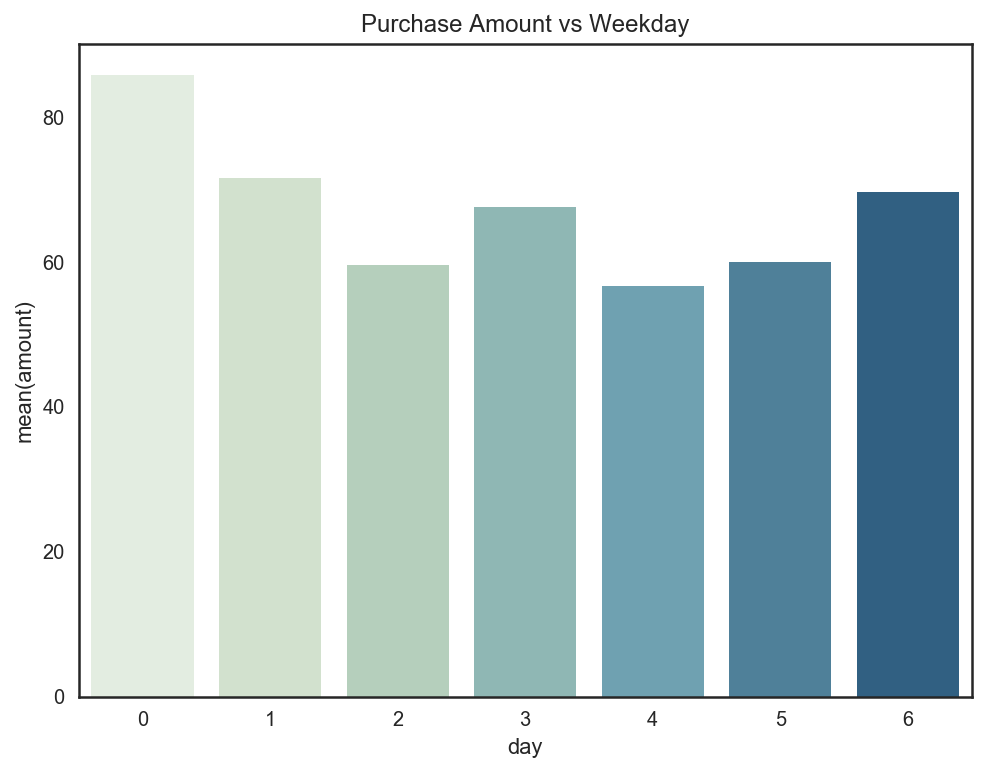

In [18]:
# reminder: Monday is 0, Sunday is 6
plt.subplots(figsize=(8, 6))
sns.barplot(x="day", 
            y="amount", 
            data=case_3_df, 
            saturation = .5,
            palette='GnBu',
            ci = None).set_title('Purchase Amount vs Weekday');

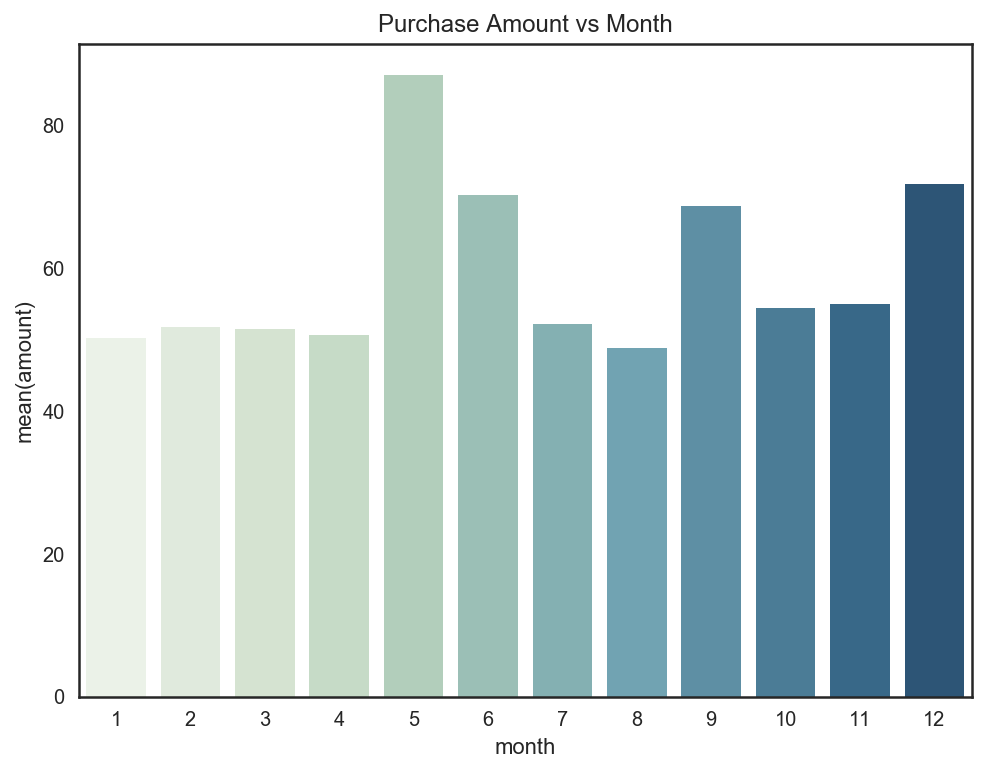

In [19]:
plt.subplots(figsize=(8, 6))
sns.barplot(x="month", 
            y="amount", 
            data=case_3_df, 
            saturation = .5,
            palette='GnBu',
            ci = None).set_title('Purchase Amount vs Month');

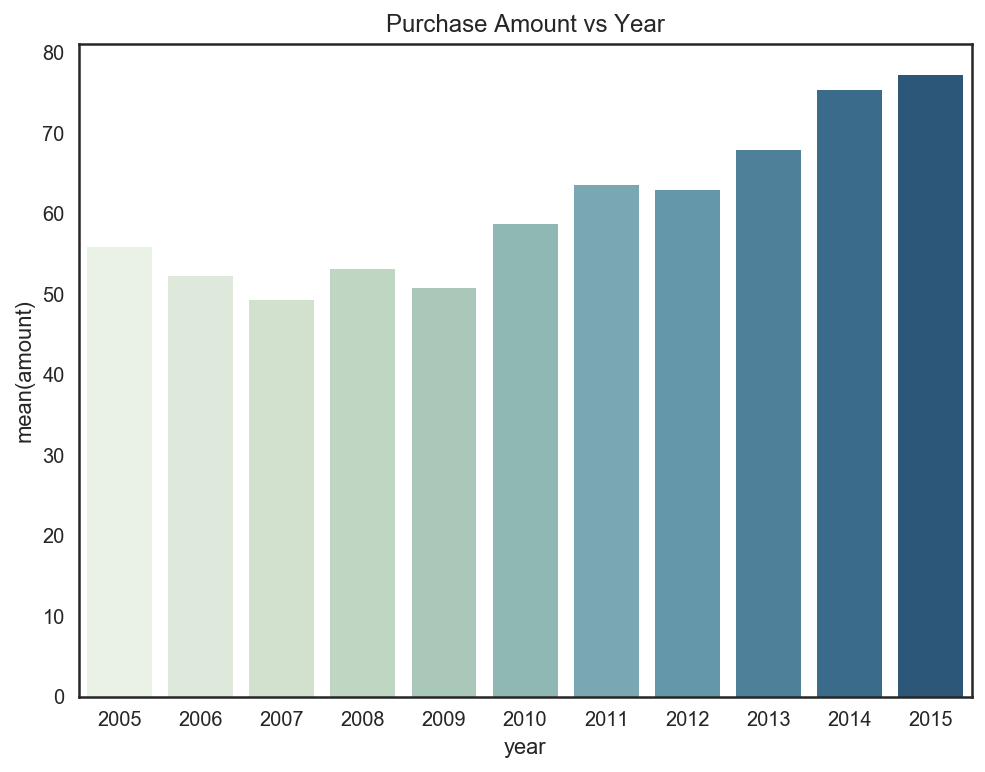

In [20]:
plt.subplots(figsize=(8, 6))
sns.barplot(x="year", 
            y="amount", 
            data=case_3_df, 
            saturation = .5,
            palette='GnBu',
            ci = None).set_title('Purchase Amount vs Year');

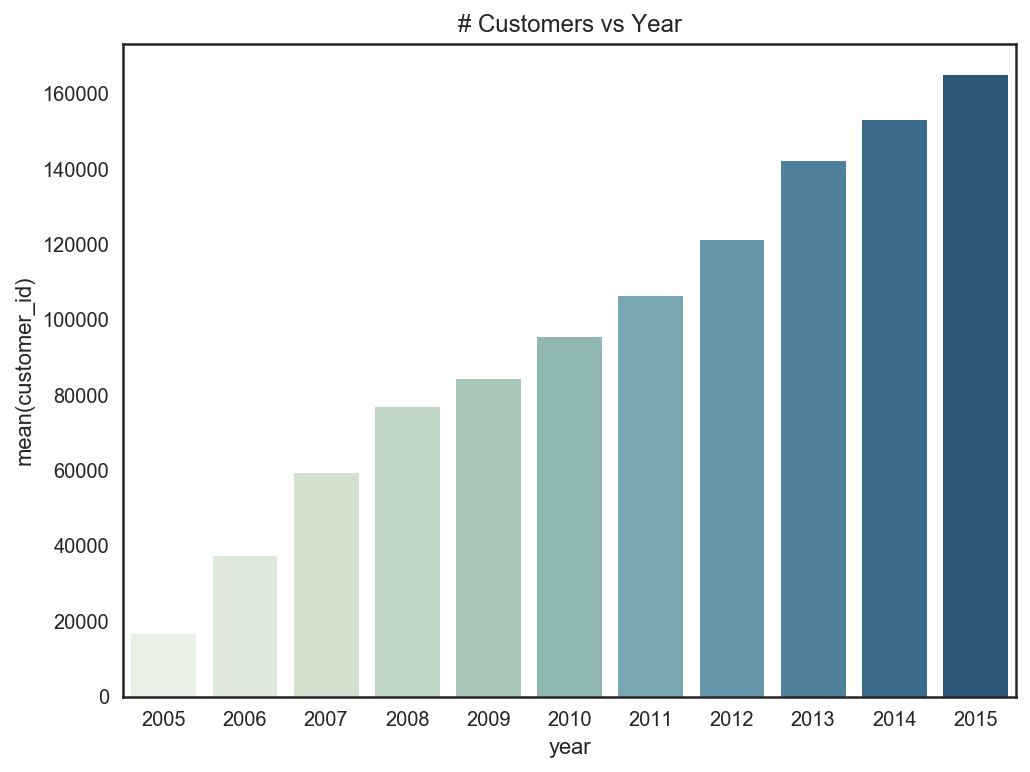

In [21]:
plt.subplots(figsize=(8, 6))
sns.barplot(x="year", 
            y="customer_id", 
            data=case_3_df, 
            saturation = .5,
            palette='GnBu',
            ci = None).set_title('# Customers vs Year');

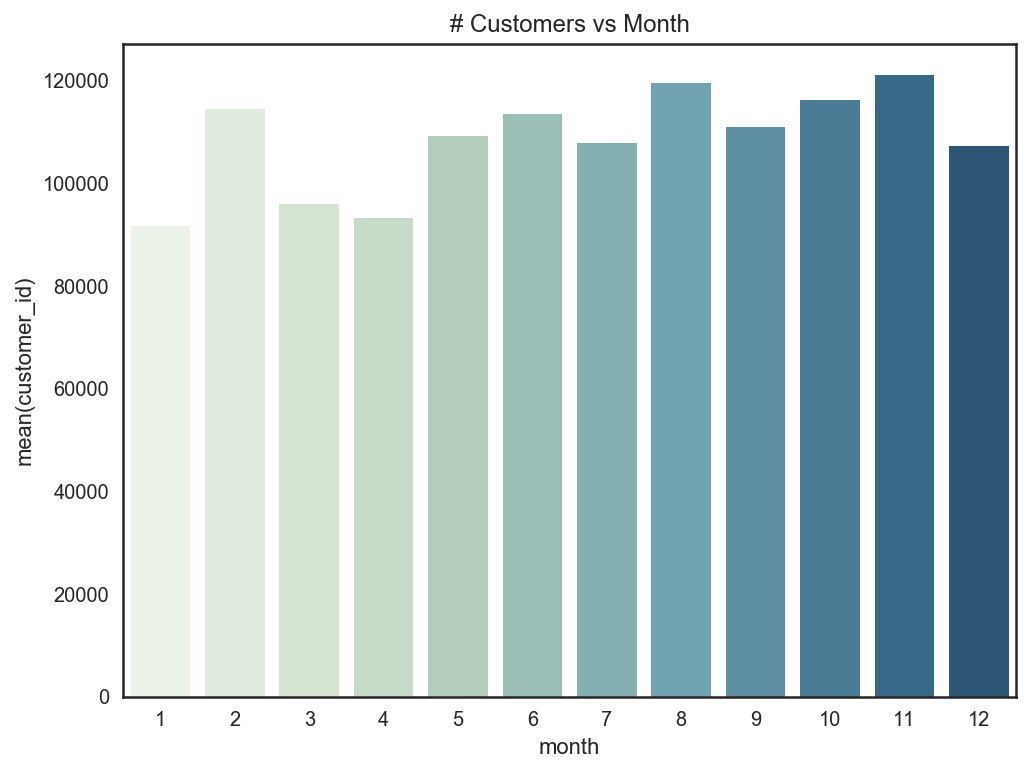

In [22]:
plt.subplots(figsize=(8, 6))
sns.barplot(x="month", 
            y="customer_id", 
            data=case_3_df, 
            saturation = .5,
            palette='GnBu',
            ci = None).set_title('# Customers vs Month');

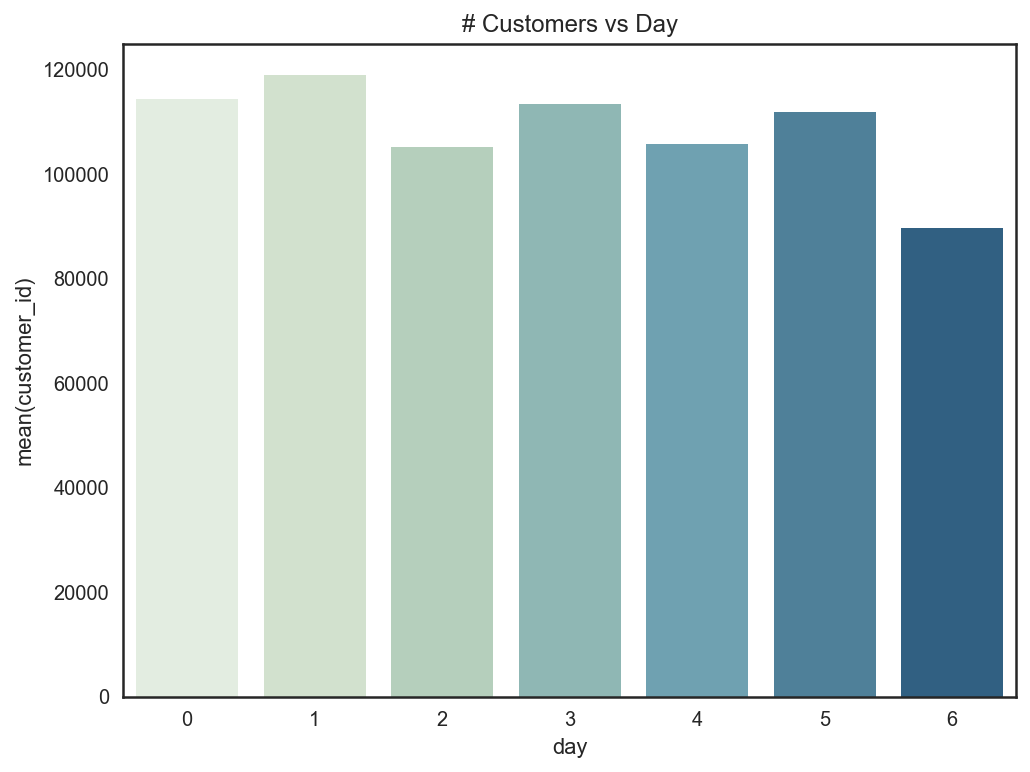

In [23]:
plt.subplots(figsize=(8, 6))
sns.barplot(x="day", 
            y="customer_id", 
            data=case_3_df, 
            saturation = .5,
            palette='GnBu',
            ci = None).set_title('# Customers vs Day');